In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eth-hourly/ETH_hourly_data.csv


In [2]:
pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 515.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


from plotly import tools
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)



import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dense, Dropout,GRU

In [4]:
data = pd.read_csv("/kaggle/input/eth-hourly/ETH_hourly_data.csv")
data['date'] = data['date']/1000
data['date'] = data['date'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%y-%m-%d %H:%M:%S'))

data.head(5)

,Unnamed: 0,index,date,open,high,low,close,volume
0,0,0,20-06-13 11:00:00,235.89,236.11,235.00,235.49,9425.79290
1,1,1,20-06-13 12:00:00,235.50,236.82,235.06,236.38,15799.02804
2,2,2,20-06-13 13:00:00,236.38,236.56,235.61,236.33,7264.88729
3,3,3,20-06-13 14:00:00,236.35,238.39,236.29,237.76,24624.57173
4,4,4,20-06-13 15:00:00,237.78,238.05,236.98,237.12,10134.14025


In [5]:
train_size = int(len(data) * 0.80)
test_size = len(data) - train_size
train_df, test_df = data[0:train_size], data[train_size:len(data)]


df = data[['open']]
df.head(5)

,open
0,235.89
1,235.50
2,236.38
3,236.35
4,237.78


In [6]:
dataset = df.values
dataset = dataset.astype('float32')
dataset.shape

(16778, 1)

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset.shape

(16778, 1)

In [8]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

13422 3356


In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [10]:
look_back = 3
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test, look_back=look_back)

In [11]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
# # Hyperparameters
# hidden_unit = 50
# batch_size= 124
# epoch = 200

# # Architecture Gated Recurrent Unit
# model = Sequential()

# # # First GRU layer with dropout
# model.add(GRU(units=hidden_unit, return_sequences=True, input_shape=(1,look_back), activation = 'tanh'))
# model.add(Dropout(0.2))
# # Second GRU layer with dropout
# model.add(GRU(units=hidden_unit, return_sequences=True, activation = 'tanh'))
# model.add(Dropout(0.2))
# # Third GRU layer with dropout
# model.add(GRU(units=hidden_unit, return_sequences=False, activation = 'tanh'))
# model.add(Dropout(0.2))

# # Output layer
# model.add(Dense(units=1))

# # Compiling the Gated Recurrent Unit
# model.compile(loss='mean_squared_error', optimizer='adam')

# # Fitting ke data training dan data validation
# model.fit(trainX, trainY, epochs=200, batch_size=128, verbose=1)

In [13]:
model = Sequential()
model.add(LSTM(50, input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=128, verbose=1)

2022-07-19 07:40:00.875459: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-19 07:40:01.040639: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-19 07:40:01.041897: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-19 07:40:01.044752: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/200


2022-07-19 07:40:08.689989: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


105/105 [==============================] - 6s 4ms/step - loss: 0.0519
Epoch 2/200
105/105 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 3/200
105/105 [==============================] - 0s 4ms/step - loss: 2.7663e-04
Epoch 4/200
105/105 [==============================] - 0s 4ms/step - loss: 2.0152e-04
Epoch 5/200
105/105 [==============================] - 0s 4ms/step - loss: 1.6433e-04
Epoch 6/200
105/105 [==============================] - 0s 4ms/step - loss: 1.2806e-04
Epoch 7/200
105/105 [==============================] - 0s 4ms/step - loss: 9.5287e-05
Epoch 8/200
105/105 [==============================] - 0s 4ms/step - loss: 6.9599e-05
Epoch 9/200
105/105 [==============================] - 0s 4ms/step - loss: 5.3225e-05
Epoch 10/200
105/105 [==============================] - 0s 4ms/step - loss: 4.5841e-05
Epoch 11/200
105/105 [==============================] - 0s 4ms/step - loss: 4.3184e-05
Epoch 12/200
105/105 [==============================] - 0s 4ms/step - lo

In [14]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [15]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [16]:
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 25.44 RMSE


In [17]:
def get_metrics_result(metrics, true_labels, predicted_labels):    
    metrics_result = []
    for metric in metrics:
        metric.reset_states()
        metric.update_state(true_labels, predicted_labels)
        metrics_result.append(metric.result().numpy())
    
    return metrics_result

In [18]:
metrics = [
    tf.keras.metrics.MeanAbsoluteError(),
    tf.keras.metrics.RootMeanSquaredError()
]

test_metrics = get_metrics_result(metrics,testY[0], testPredict[:, 0])
test_metrics.insert(0, 'Test')


In [19]:
COL_NAMES = ['', 'MAE', 'RMSE']
metrics_table = pd.DataFrame([test_metrics], columns=COL_NAMES)
metrics_table = metrics_table.set_index([''])
metrics_table.round(3)

,MAE,RMSE
,,
Test,17.708,25.440001


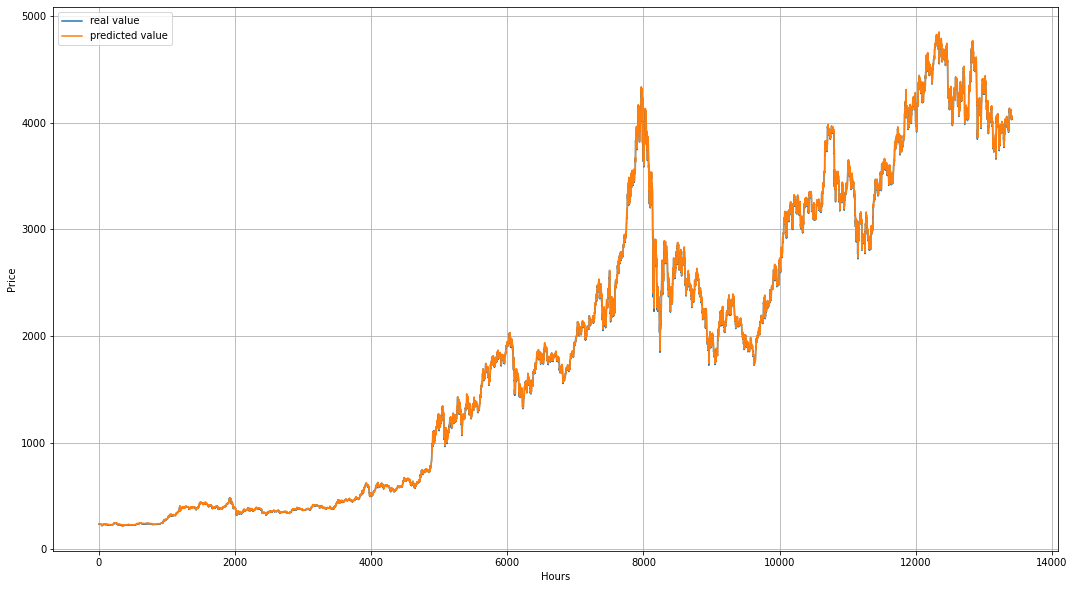

In [20]:
def plot_series(time, series, lab, form='-', start=0, end=None):
    
    plt.plot(time[start:end], series[start:end], form, label=lab )
    plt.xlabel("Hours")
    plt.ylabel("Price")
    plt.grid(True)


plt.figure(figsize=(18, 10))
plot_series(np.arange(trainY[0].shape[0]), trainY[0], "real value" )
plot_series(np.arange(trainY[0].shape[0]), trainPredict[:, 0], "predicted value")
plt.legend(loc='upper left')


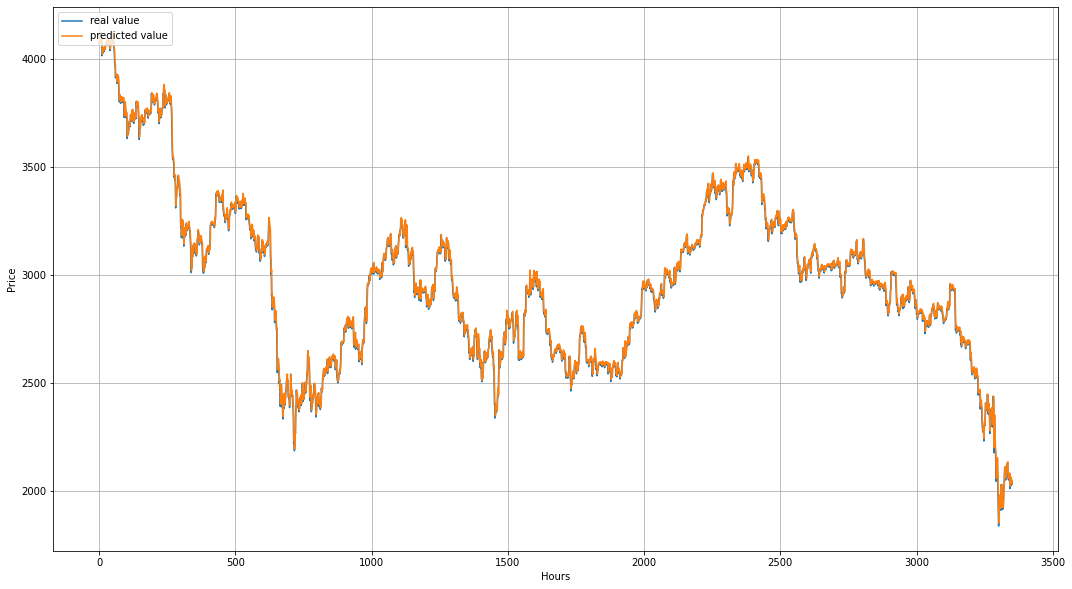

In [21]:
plt.figure(figsize=(18, 10))
plot_series(np.arange(testY[0].shape[0]), testY[0], "real value" )
plot_series(np.arange(testY[0].shape[0]), testPredict[:, 0], "predicted value")
plt.legend(loc='upper left')

In [22]:
# Comparison data test with data prediction ## TEST
datacompare_test = pd.DataFrame()

datacompare_test['Data Test'] =  testY[0]
datacompare_test['Prediction Results'] =  testPredict[:, 0]
datacompare_test

,Data Test,Prediction Results
0,4075.480056,4084.996582
1,4067.560116,4081.625488
2,4081.200105,4073.885498
3,4076.909861,4087.096191
4,4105.500172,4083.055420
...,...,...
3347,2054.399962,2052.706055
3348,2023.240030,2059.509277
3349,2036.000117,2030.985596
3350,2042.460039,2041.310059


In [23]:
# Comparison data test with data prediction ## TRAIN
datacompare_train = pd.DataFrame()

datacompare_train['Data Test'] =  trainY[0]
datacompare_train['Prediction Results'] =  trainPredict[:, 0]
datacompare_train

,Data Test,Prediction Results
0,236.350007,238.705399
1,237.780002,238.728287
2,237.130009,239.979614
3,237.210008,239.566254
4,237.030006,239.687302
...,...,...
13413,4052.909992,4063.468262
13414,4057.529957,4059.072998
13415,4046.939962,4063.598145
13416,4033.679912,4053.280518


In [24]:
from plotly import tools
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

trace1 = go.Scatter(
    x = test_df['date'],
    y = datacompare_test['Data Test'].astype(float),
    mode = 'lines',
    name = 'Actual'
)

trace2 = go.Scatter(
    x = test_df['date'],
    y = datacompare_test['Prediction Results'].astype(float),
    mode = 'lines',
    name = 'Predicted'
)

layout = dict(
    title='Test Opening price with the Slider ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                #change the count to desired amount of months.
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=24,
                     label='2y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1,trace2]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")